# Timeseries processing examples

In [91]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

## 1. Downsampling

* we have regularly distributed data (e.g. hourly)
* we want to change the time resolution downwards (e.g. daily) 
 

In [92]:
time_series_hourly = pd.read_json('data_hourly.json')
time_series_hourly.dtypes

timeStamp    datetime64[ns]
value               float64
dtype: object

Make timestamp as index

In [93]:
time_series_hourly = time_series_hourly.set_index('timeStamp')
time_series_hourly.index

DatetimeIndex(['2019-09-01 00:00:00', '2019-09-01 01:00:00',
               '2019-09-01 02:00:00', '2019-09-01 03:00:00',
               '2019-09-01 04:00:00', '2019-09-01 05:00:00',
               '2019-09-01 06:00:00', '2019-09-01 07:00:00',
               '2019-09-01 08:00:00', '2019-09-01 09:00:00',
               ...
               '2019-09-11 01:00:00', '2019-09-11 02:00:00',
               '2019-09-11 03:00:00', '2019-09-11 04:00:00',
               '2019-09-11 05:00:00', '2019-09-11 06:00:00',
               '2019-09-11 07:00:00', '2019-09-11 08:00:00',
               '2019-09-11 09:00:00', '2019-09-11 10:00:00'],
              dtype='datetime64[ns]', name='timeStamp', length=259, freq=None)

In [94]:
time_series_hourly

,value
timeStamp,
2019-09-01 00:00:00,0.516019
2019-09-01 01:00:00,0.516175
2019-09-01 02:00:00,0.516175
2019-09-01 03:00:00,0.517555
2019-09-01 04:00:00,0.517555
...,...
2019-09-11 06:00:00,0.517241
2019-09-11 07:00:00,0.517241
2019-09-11 08:00:00,0.515706


Plot raw data

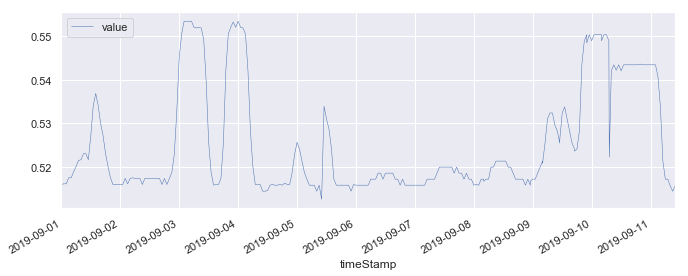

In [95]:
time_series_hourly.plot(linewidth=0.5)

Downsample and plot

1D-mean      float64
1D-median    float64
1D-min       float64
1D-max       float64
dtype: object

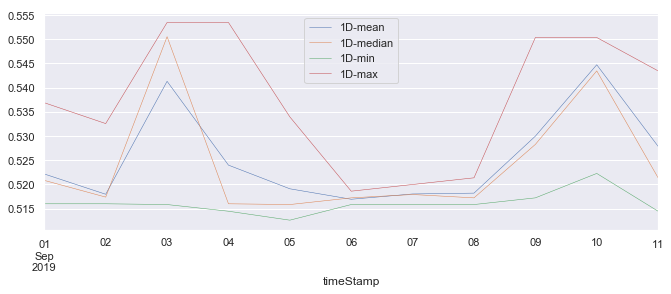

In [96]:
time_series_downsampled = time_series_hourly.resample("1D").asfreq().drop(columns=['value'])
time_series_downsampled['1D-mean'] = time_series_hourly['value'].resample("1D").mean() 
time_series_downsampled['1D-median'] = time_series_hourly['value'].resample("1D").median() 
time_series_downsampled['1D-min'] = time_series_hourly['value'].resample("1D").min() 
time_series_downsampled['1D-max'] = time_series_hourly['value'].resample("1D").max() 
time_series_downsampled.plot(linewidth=0.5)

time_series_downsampled.dtypes

## 2. Upsampling

* we have regularly distributed data (e.g. weekly)
* and we want to increase time resolution (e.g. daily)

In [97]:
time_series_weekly = pd.read_json('data_weekly.json')
time_series_weekly = time_series_weekly.set_index('date_time')
time_series_weekly.index

DatetimeIndex(['2019-01-01', '2019-01-08', '2019-01-15', '2019-01-22',
               '2019-01-29'],
              dtype='datetime64[ns]', name='date_time', freq=None)

In [98]:
time_series_weekly


,value
date_time,
2019-01-01,0.1
2019-01-08,0.5
2019-01-15,0.7
2019-01-22,0.3
2019-01-29,0.4


Plot raw data

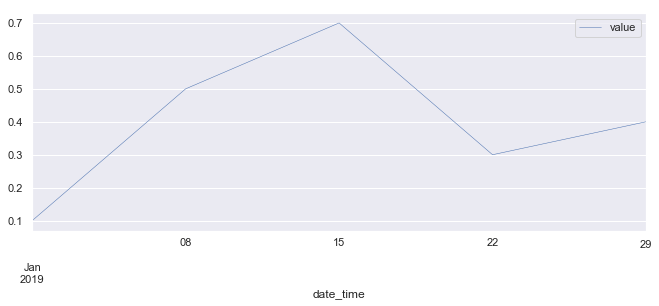

In [99]:
time_series_weekly.plot(linewidth=0.5)


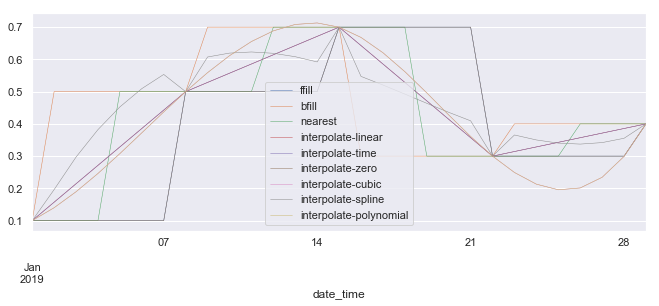

In [100]:
time_series_upsampled = time_series_weekly.resample("1D").asfreq().drop(columns=['value'])
time_series_upsampled['ffill'] = time_series_weekly['value'].resample("1D").ffill() 
time_series_upsampled['bfill'] = time_series_weekly['value'].resample("1D").bfill() 
time_series_upsampled['nearest'] = time_series_weekly['value'].resample("1D").nearest() 
time_series_upsampled['interpolate-linear'] = time_series_weekly['value'].resample("1D").interpolate(method='linear') 
time_series_upsampled['interpolate-time'] = time_series_weekly['value'].resample("1D").interpolate(method='time') 
time_series_upsampled['interpolate-zero'] = time_series_weekly['value'].resample("1D").interpolate(method='zero') 
time_series_upsampled['interpolate-cubic'] = time_series_weekly['value'].resample("1D").interpolate(method='cubic') 
time_series_upsampled['interpolate-spline'] = time_series_weekly['value'].resample("1D").interpolate(method='spline', order=3) 
time_series_upsampled['interpolate-polynomial'] = time_series_weekly['value'].resample("1D").interpolate(method='polynomial', order=3) 
time_series_upsampled.plot(linewidth=0.5)

## 3. Fill the gaps

* we have data with gaps (e.g. daily)
* we want to fill the gaps (e.g. daily)


In [101]:
time_series_fill_the_gaps = pd.read_json('data_daily_with_gaps.json')
time_series_fill_the_gaps = time_series_fill_the_gaps.set_index('date_time')
time_series_fill_the_gaps.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13'],
              dtype='datetime64[ns]', name='date_time', freq=None)

In [102]:
time_series_fill_the_gaps

,value
date_time,
2019-01-01,0.10
2019-01-02,0.50
2019-01-03,0.40
2019-01-04,0.35
2019-01-05,0.38
2019-01-07,0.55
2019-01-08,0.70
2019-01-09,NaN
2019-01-10,0.66


In [103]:
time_series_with_gaps_filled = time_series_fill_the_gaps.resample("1D").asfreq() 
time_series_with_gaps_filled

,value
date_time,
2019-01-01,0.10
2019-01-02,0.50
2019-01-03,0.40
2019-01-04,0.35
2019-01-05,0.38
2019-01-06,NaN
2019-01-07,0.55
2019-01-08,0.70
2019-01-09,NaN


In [104]:
time_series_with_gaps_filled = time_series_with_gaps_filled.fillna(method='ffill')
time_series_with_gaps_filled

,value
date_time,
2019-01-01,0.10
2019-01-02,0.50
2019-01-03,0.40
2019-01-04,0.35
2019-01-05,0.38
2019-01-06,0.38
2019-01-07,0.55
2019-01-08,0.70
2019-01-09,0.70
